***Syntax natürlicher Sprachen, WS 2021/22***

---
# Übung 8

In [1]:
from nltk.tree import Tree
import nltk
import sys

In [2]:
import spacy
from spacy import displacy

In [3]:
def transform_nr_conll(sent_nr):
    sent_list = []
    for line in list(filter(None, sent_nr.split("\n"))):
        line_list = line.split()
        line_list.pop(0)
        line_list.insert(1,"_")
        sent_list.append(" ".join([i for i in line_list[0:]]))

    return "\n".join([i for i in sent_list[0:]])

In [4]:
from nltk import DependencyGraph
from nltk.tree import Tree
from itertools import chain


### tree_labeled-Methode für DependencyGraphs (pretty_print-Dependenzbäume mit Labels):
def _tree_labeled(self, i):
        node = self.get_by_address(i)
        word = node["word"]
        rel = node["rel"]        
        deps = sorted(chain.from_iterable(node["deps"].values()))

        if deps:
            return Tree(word+'('+rel+')', [self._tree_labeled(dep) for dep in deps])
        else:
            return word+'('+rel+')'
        
def tree_labeled(self):
        node = self.root

        word = node["word"]
        rel = node["rel"]
        deps = sorted(chain.from_iterable(node["deps"].values()))
        return Tree(word+'('+rel+')', [self._tree_labeled(dep) for dep in deps])

    
DependencyGraph._tree_labeled = _tree_labeled
DependencyGraph.tree_labeled = tree_labeled

In [5]:
#Konvertierungsfunktion von conll(4)-Format (MALT-tabular) für Rendering mit displaCy:
def displacy_dep_input(sent):
    deps = []
    for dep in sent.split('\n'):
        deps.append(dep.split())

    deps = [x for x in deps if x]

    ex = []
    word_list = []
    arc_list = []

    for index, dep in enumerate(deps):
        word_list.append({"text": dep[0], "tag": ""})
        line = index+1
        head = int(dep[2])
        label = dep[3]
        if head>line:
            start = index
            end = head-1
            direction = "left"
        else:
            start = head-1
            end = index  
            direction = "right"
        if(label.lower() != "root"):
            arc_list.append({"start": start, "end": end, "label": label, "dir": direction})

    ex.append({
        "words": word_list,
        "arcs": arc_list
    })    

    return ex

#html = displacy.render(ex, style="dep", manual=True, options={'distance':100})

In [6]:
def show_dep_trees(sent_nr):
    sent = transform_nr_conll(sent_nr)
    dg = DependencyGraph(sent)

    tree_labeled = dg.tree_labeled()
    tree_labeled.pretty_print(unicodelines=True)   
    
    ex = displacy_dep_input(sent)
    html = displacy.render(ex, style="dep", manual=True, options={'distance':100})

--- 
## Aufgabe 1: Syntaxregeln komplexer Sätze
#### Geben Sie zu den folgenden CFG-Outputs des Stanford-Parsers (trainiert auf Penn-Treebank) anhand der Ableitungsbäume die Regeln der jeweils auftretenden komplexen Satzkonstruktionen an und benennen Sie den Satz- bzw. Konstruktionstyp. 

#### Analysieren Sie anschließend die Dependenzstruktur der Sätze im UD-Schema und geben Sie dann explizit die verwendeten Dependenzregeln für die komplexen Satzkonstruktionen an.


- Penn-Treebank Tagset: http://surdeanu.cs.arizona.edu//mihai/teaching/ista555-fall13/readings/PennTreebankConstituents.html
- UD Dependency Tagset: https://universaldependencies.org/u/dep/all.html

---
### Aufgabe 1a: 

In [7]:
sentence = "I believe that you win."

### Fragen:

#### Was für eine Satzkonstruktion liegt hier vor? (koordiniert?, subordiniert?, keines von beiden?)

#### Welcher eingebettete Satztyp liegt vor? (Subjekt-, Objekt-, Kausal-, Lokal-, Modal-, Temporal-, Relativsatz?)

#### Wie läßt sich dieser Satztyp klassifizieren? (Komplement-, Adverbial-, Attributsatz?)


### *Konstituentenanalyse:*

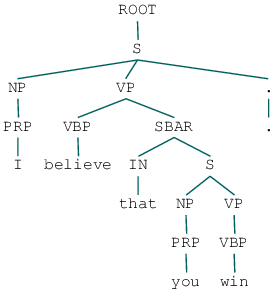

In [8]:
tree_str = '(ROOT (S (NP (PRP I)) (VP (VBP believe) (SBAR (IN that) (S (NP (PRP you)) (VP (VBP win))))) (. .)))'
Tree.fromstring(tree_str)

#### Geben Sie die CFG-Ableitungsregeln für diese komplexe Satzkonstruktion an:

*Hier fehlt Ihre Lösung*

---
### *Dependenzanalyse:*

In [9]:
sent_nr = """
1 I  
2 believe
3 that
4 you
5 win
"""

#show_dep_trees(sent_nr)

#### Geben Sie die Dependenzregeln für diese komplexe Satzkonstruktion an:

*Hier fehlt Ihre Lösung*

---
### Aufgabe 1b: 

In [10]:
sentence = "I want to believe."

### Fragen:

#### Was für eine Satzkonstruktion liegt hier vor? (koordiniert?, subordiniert?, keines von beiden?)

#### Welcher eingebettete Satztyp liegt vor? (Subjekt-, Objekt-, Kausal-, Lokal-, Modal-, Temporal-, Relativsatz?)

#### Wie läßt sich dieser Satztyp klassifizieren? (Komplement-, Adverbial-, Attributsatz?)


### Zusatzfragen:

#### Welche Form der Kontrolle liegt hier vor? (Subjekt- oder Objektkontrolle?)

#### Welche Form der Kontrolle liegt in folgendem Satz vor: *Sie überreden ihn, nach München zu fahren?*

#### Welche satzwertigen Funktionen können Infinitivkonstruktionen erfüllen? (Adverbialsatz (`advcl`), Attributsatz (`acl`), Komplementsatz (`xcomp`), Relativsatz)

### *Konstituentenanalyse:*

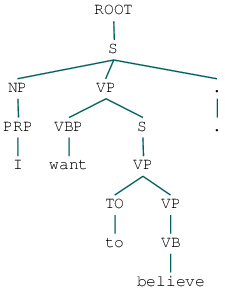

In [11]:
tree_str = '(ROOT (S (NP (PRP I)) (VP (VBP want) (S (VP (TO to) (VP (VB believe))))) (. .)))'
Tree.fromstring(tree_str)

#### Geben Sie die CFG-Ableitungsregeln für diese komplexe Satzkonstruktion an:

*Hier fehlt Ihre Lösung*

---
### *Dependenzanalyse:*

In [12]:
sent_nr = """
1 I  
2 want
3 to
4 believe
"""

#show_dep_trees(sent_nr)

#### Geben Sie die Dependenzregeln für diese komplexe Satzkonstruktion an:

*Hier fehlt Ihre Lösung*

---
### Aufgabe 1c: 

In [13]:
sentence = "the man who knew too much"

### Fragen:

#### Was für eine Satzkonstruktion liegt hier vor? (koordiniert?, subordiniert?, keines von beiden?)

#### Welcher eingebettete Satztyp liegt vor? (Subjekt-, Objekt-, Kausal-, Lokal-, Modal-, Temporal-, Relativsatz?)

#### Wie läßt sich dieser Satztyp klassifizieren? (Komplement-, Adverbial-, Attributsatz?)


### Zusatzfragen:

#### Welche Attributsatztypen haben Sie in der Vorlesung kennengelernt? 

### *Konstituentenanalyse:*

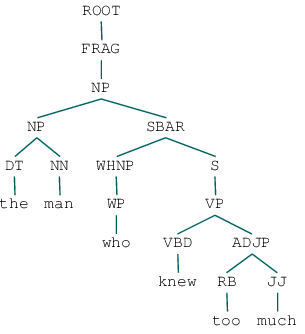

In [14]:
tree_str = '(ROOT (FRAG (NP (NP (DT the) (NN man)) (SBAR (WHNP (WP who)) (S (VP (VBD knew) (ADJP (RB too) (JJ much))))))))'
Tree.fromstring(tree_str)

#### Geben Sie die CFG-Ableitungsregeln für diese komplexe Satzkonstruktion an:

*Hier fehlt Ihre Lösung*

---
### *Dependenzanalyse:*

In [15]:
sent_nr = """
1 the
2 man
3 who
4 knew
5 too
6 much
"""

#show_dep_trees(sent_nr)

#### Geben Sie die Dependenzregeln für diese komplexe Satzkonstruktion an:

*Hier fehlt Ihre Lösung*

---
### Aufgabe 1d: 

In [16]:
sentence = "They left, but they came back."

### Fragen:

#### Was für eine Satzkonstruktion liegt hier vor? (koordiniert?, subordiniert?, keines von beiden?)

#### Welcher eingebettete Satztyp liegt vor? (Subjekt-, Objekt-, Kausal-, Lokal-, Modal-, Temporal-, Relativsatz?)

#### Wie läßt sich dieser Satztyp klassifizieren? (Komplement-, Adverbial-, Attributsatz?)


### *Konstituentenanalyse:*

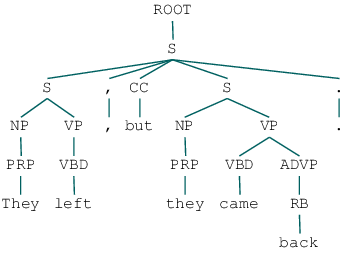

In [17]:
tree_str = '(ROOT (S (S (NP (PRP They)) (VP (VBD left))) (, ,) (CC but) (S (NP (PRP they)) (VP (VBD came) (ADVP (RB back)))) (. .)))'
Tree.fromstring(tree_str)

#### Geben Sie die CFG-Ableitungsregeln für diese komplexe Satzkonstruktion an:

*Hier fehlt Ihre Lösung*

---
### *Dependenzanalyse:*

In [18]:
sent_nr = """
1 they
2 left
3 but
4 they
5 came
6 back
"""

#show_dep_trees(sent_nr)

#### Geben Sie die Dependenzregeln für diese komplexe Satzkonstruktion an:

*Hier fehlt Ihre Lösung:*


---
### Aufgabe 1e: 

In [19]:
sentence = "This can't be right."

### Fragen:

#### Was für eine Satzkonstruktion liegt hier vor? (koordiniert?, subordiniert?, keines von beiden?)

#### Welcher eingebettete Satztyp liegt vor? (Subjekt-, Objekt-, Kausal-, Lokal-, Modal-, Temporal-, Relativsatz?)

#### Wie läßt sich dieser Satztyp klassifizieren? (Komplement-, Adverbial-, Attributsatz?)


### *Konstituentenanalyse:*

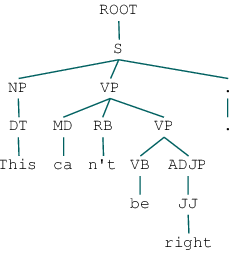

In [20]:
tree_str = "(ROOT (S (NP (DT This)) (VP (MD ca) (RB n't) (VP (VB be) (ADJP (JJ right)))) (. .)))"
Tree.fromstring(tree_str)

#### Geben Sie die CFG-Ableitungsregeln für diese komplexe Satzkonstruktion an:

*Hier fehlt Ihre Lösung*

---
### *Dependenzanalyse:*

In [21]:
sent_nr = """
1 this
2 ca
3 n\'t
4 be
5 right
"""

#show_dep_trees(sent_nr)

#### Geben Sie die Dependenzregeln für diese komplexe Satzkonstruktion an:

*Hier fehlt Ihre Lösung:*


---
### Aufgabe 1f: 

In [22]:
sentence = "When the storm started, she was still outside."

### Fragen:

#### Was für eine Satzkonstruktion liegt hier vor? (koordiniert?, subordiniert?, keines von beiden?)

#### Welcher eingebettete Satztyp liegt vor? (Subjekt-, Objekt-, Kausal-, Lokal-, Modal-, Temporal-, Relativsatz?)

#### Wie läßt sich dieser Satztyp klassifizieren? (Komplement-, Adverbial-, Attributsatz?)


### *Konstituentenanalyse:*

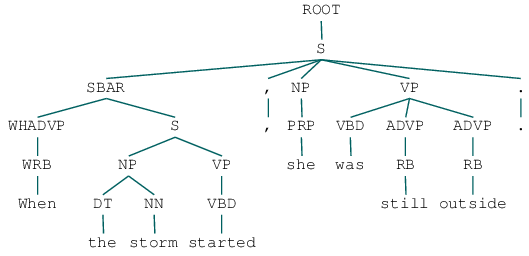

In [23]:
tree_str = '(ROOT (S (SBAR (WHADVP (WRB When)) (S (NP (DT the) (NN storm)) (VP (VBD started)))) (, ,) (NP (PRP she)) (VP (VBD was) (ADVP (RB still)) (ADVP (RB outside))) (. .)))'
Tree.fromstring(tree_str)

#### Geben Sie die CFG-Ableitungsregeln für diese komplexe Satzkonstruktion an:

*Hier fehlt Ihre Lösung*

---
### *Dependenzanalyse:*

In [24]:
sent_nr = """
1 when
2 the
3 storm
4 started
5 she
6 was
7 still
8 outside
"""

#show_dep_trees(sent_nr)

#### Geben Sie die Dependenzregeln für diese komplexe Satzkonstruktion an:

*Hier fehlt Ihre Lösung:*


---
### Aufgabe 1g: 

In [25]:
sentence = "To go now would be a mistake."

### Fragen:

#### Was für eine Satzkonstruktion liegt hier vor? (koordiniert?, subordiniert?, keines von beiden?)

#### Welcher eingebettete Satztyp liegt vor? (Subjekt-, Objekt-, Kausal-, Lokal-, Modal-, Temporal-, Relativsatz?)

#### Wie läßt sich dieser Satztyp klassifizieren? (Komplement-, Adverbial-, Attributsatz?)


### *Konstituentenanalyse:*

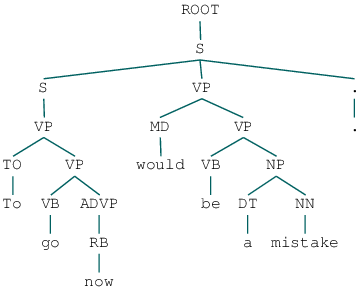

In [26]:
tree_str = '(ROOT (S (S (VP (TO To) (VP (VB go) (ADVP (RB now))))) (VP (MD would) (VP (VB be) (NP (DT a) (NN mistake)))) (. .)))'
Tree.fromstring(tree_str)

#### Geben Sie die CFG-Ableitungsregeln für diese komplexe Satzkonstruktion an:

*Hier fehlt Ihre Lösung*

---
### *Dependenzanalyse:*

In [27]:
sent_nr = """
1 to
2 go
3 now
4 would
5 be
6 a
7 mistake
"""

#show_dep_trees(sent_nr)

#### Geben Sie die Dependenzregeln für diese komplexe Satzkonstruktion an:

*Hier fehlt Ihre Lösung:*


---
## Aufgabe 2: Stellungsfeldermodell

#### Zerlegen Sie den folgenden Satz in Satzklammern und Stellungsfelder. 

#### Analysieren Sie sowohl den Haupt- als auch den Nebensatz auf diese Weise.

*Der kleine Junge hat heute das Buch gelesen, das ihm sein Vater zu Weihnachten schenkte.*

---
# Hausaufgaben

---
## Aufgabe 3: Imperativ ohne Subjekt

#### Betrachten Sie die folgende kontextfreie Merkmalsgrammatik:

In [28]:
grammar = """
S -> NP VP
S -> VP

NP -> DET N
VP -> V[SUBCAT=tr] NP
VP -> V[SUBCAT=intr]

DET -> "das"
N -> "Kind" | "Buch"

V[SUBCAT=tr] -> "lies"
V[SUBCAT=tr] -> "liest"
V[SUBCAT=intr] -> "schlaf"
V[SUBCAT=intr] -> "schläft"
"""

#### Hier wurde versucht, Aufforderungssätze zu modellieren. Allerdings akzeptiert diese Grammatik immer noch viele ungrammatische Sätze.

a) Fügen Sie ein Merkmal `MOOD` mit den möglichen Werten *imp* und *ind* für Imperativ und Indikativ hinzu und deklarieren Sie die entsprechenden Werte im Lexikon (den lexikalischen Regeln). <br>
b) Formulieren Sie dann Bedingungen in den syntaktischen Regeln, sodass folgende grammatische Sätze (`pos_sentences`) weiterhin akzeptiert und folgende ungrammatische Sätze (`neg_sentences`) abgelehnt werden.

In [29]:
pos_sentences = [
    "das Kind schläft",
    "das Kind liest das Buch",
    "lies das Buch",
    "schlaf"
]

neg_sentences = [
    "das Kind schlaf",
    "das Kind lies das Buch",
    "liest das Buch",
    "schläft"
]

In [30]:
from IPython.display import display

def test_grammar(grammar, sentences):
    cfg = nltk.grammar.FeatureGrammar.fromstring(grammar)
    parser = nltk.parse.FeatureEarleyChartParser(cfg)
    
    for i, sent in enumerate(sentences, 1):
        print("Satz {}: {}".format(i, sent))
        sys.stdout.flush()
        results = parser.parse(sent.split())
        analyzed = False
        for tree in results:
            display(tree)  # tree.draw() oder print(tree)
            analyzed = True
        if not analyzed:
            print("Keine Analyse möglich", file=sys.stderr)
            sys.stderr.flush()

#### Hier sollten nur korrekte Syntaxbäume herauskommen:

Satz 1: das Kind schläft


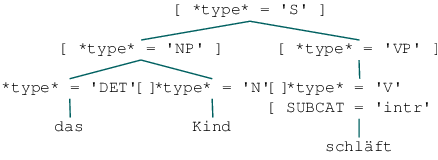

Satz 2: das Kind liest das Buch


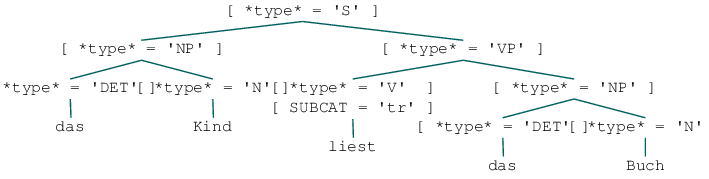

Satz 3: lies das Buch


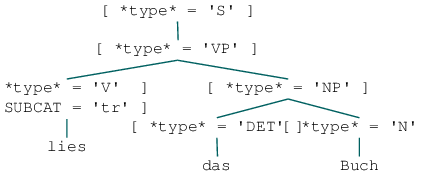

Satz 4: schlaf


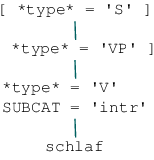

In [31]:
test_grammar(grammar, pos_sentences)

#### Hier sollte ausschließlich `Keine Analyse möglich` stehen:

Satz 1: das Kind schlaf


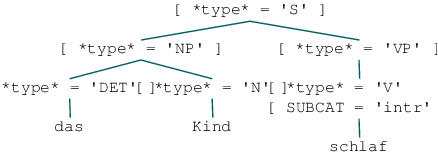

Satz 2: das Kind lies das Buch


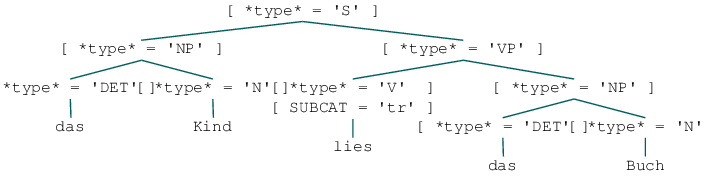

Satz 3: liest das Buch


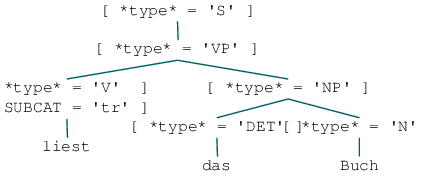

Satz 4: schläft


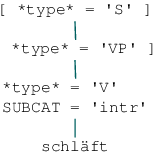

In [32]:
test_grammar(grammar, neg_sentences)